***
### R & Python Study Group - Statistical Learning
***
05/05/2021

Demo - Classification Exercise

James Bredin

### Introduction to Statistical Learning 
#### Chapter 4 Classification 
#### Applied Exercise 10


"This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010."

#### Part (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [1]:
import pandas as pd
weekly_data = pd.read_csv(r"C:\Users\james\OneDrive\Documents\R\Data\Weekly1.csv",index_col=0)

In [2]:
print(weekly_data.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
1  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
2  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
3  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
4  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
5  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


The response variable in focus i.e. direction is a derived variable which contains less information than the the stock return itself.

Would I be right in thinking this perhaps make the challenge easier to fit a model however perhaps less useful... suppose you wanted to use in the model in the context of a portfolio of stocks and bonds e.g. to predict return for the portfolio - the model for direction would be less useful than a model for the return itself.

We have a time index, a volume feature, and 5 lag returns. The feature dataset is less rich than it appears - there is less information here than the number of columns suggests. The lag features and the current return are all derived from a single return data field.

The stock market data seems like a time series dataset. We have the year of each datapoint, and have lag data over 6 weeks. Can see a diagonal pattern that indicates the data is arranged in an ordered sequence, albeit this is not tagged in the data. 

ACTION later - recap on time series concepts and how they would apply.
ACTION - could validate the weekly diagonal pattern in the whole dataset. Is it true for all i that Lag5(i) = Lag4(i-1) = ... = Lag1(i-4) = Today(i-5)

In [3]:
print(weekly_data[['Year','Lag1']].groupby('Year').count())

      Lag1
Year      
1990    47
1991    52
1992    52
1993    52
1994    52
1995    52
1996    53
1997    52
1998    52
1999    52
2000    52
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    53
2008    52
2009    52
2010    52


The count of 52 datapoints per year is broadly as expected for a weekly dataset.

In [4]:
weekly_data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


For all fields the count is 1,089 entries as expected.

The mean and standard deviation for today's data as well as the lag variables are similar, as expected, because they share largely the same data.

Similarly, the min, max, and quartiles are the same / quite close.

ACTION: Consider the finer detail here - any insights / questions for the variations across the lag fields?

In [5]:
from matplotlib import pyplot as plt
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
%matplotlib inline
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

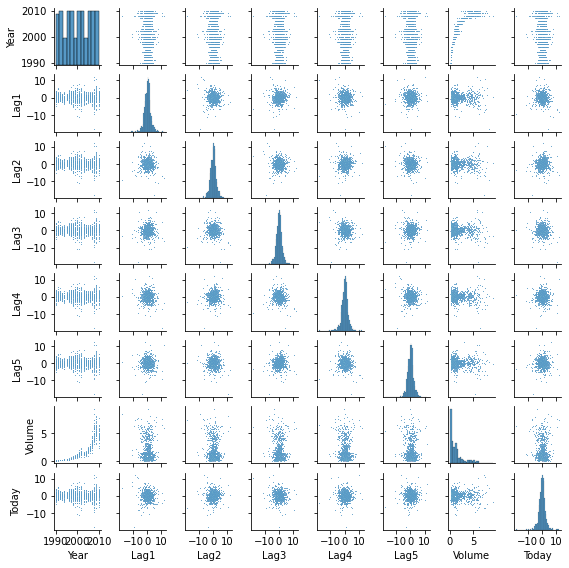

In [6]:
sns.pairplot(weekly_data,height=1,plot_kws={"s": 1})

Volume is increasing by year - this is the only strong apparent pattern to me in the above scatter plots.

This is an example of the power of these programming languages that are high level and have fit-for-purpose packages - it was very quick to write this code with the help of google especially considering I had not used this package before. It would be considerable effort to produce this in excel!

In [7]:
weekly_data.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


The correlation of volume with year is high and positive - in keeping with the observation in the plots above.

Focussing on the right hand column, we see small correations with lags 1,2,3 where 1 and 3 are negative and 2 is positive.

This is pearson's correlation, and it measures the linear relationship between pairs of variables.

What about today's return - can volume tell us anything about that? The following boxplots indicate a broadly similar story for volume on both the good days and the bad. I can't see a new a new trading strategy emerging here.

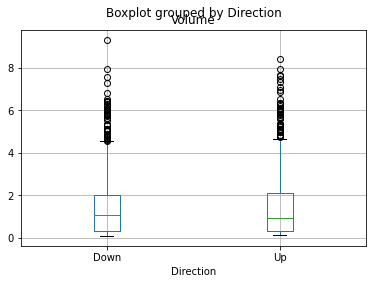

In [8]:
%matplotlib inline
fig1, ax1 = plt.subplots()
weekly_data.boxplot(column=["Volume"],by='Direction',ax=ax1)
plt.show()

#### Part (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [9]:
x_data = weekly_data.iloc[:,1:7]
y_data = weekly_data.iloc[:,8]
print("x_data:\n\n",x_data.head(),"\n")
print("y_data:\n\n",y_data.head())

x_data:

     Lag1   Lag2   Lag3   Lag4   Lag5    Volume
1  0.816  1.572 -3.936 -0.229 -3.484  0.154976
2 -0.270  0.816  1.572 -3.936 -0.229  0.148574
3 -2.576 -0.270  0.816  1.572 -3.936  0.159837
4  3.514 -2.576 -0.270  0.816  1.572  0.161630
5  0.712  3.514 -2.576 -0.270  0.816  0.153728 

y_data:

 1    Down
2    Down
3      Up
4      Up
5      Up
Name: Direction, dtype: object


In [10]:
import numpy as np

conds = [y_data == 'Down',y_data=='Up']
choices = [0,1]

y_data_sm = pd.Series(np.select(conds,choices))

y_data_sm.index +=1
y_data_sm.head()

#action - explore better ways of achieving the above

1    0
2    0
3    1
4    1
5    1
dtype: int32

In [11]:
import statsmodels.api as sm
logreg_sm = sm.Logit(y_data_sm, x_data).fit()
print(logreg_sm.summary())

Optimization terminated successfully.
         Current function value: 0.686896
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 May 2021   Pseudo R-squ.:               9.505e-05
Time:                        19:10:29   Log-Likelihood:                -748.03
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9996
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0327      0.026     -1.250      0.211      -0.084       0.019
Lag2           0.0682      0.

The coefficient for Lag2 is positive vs all other lag returns are negative.

Higher stock returns a fortnight ago predict a higher probability of a positive return this week, when this model is used.

This is broadly in line with the pattern of correlations of today's return vs the lag returns seen above, while noting that the correlations relate to linear regression vs return which is not the same as logistic regression on the direction category, so wouldn't necessarily expect these to align perfectly.

Lag2 has a small P value. Perhaps this is not intuitive?

Volume also has a positive correlation and P value of less than 0.05.

Some of you may have spotted a shortcoming of the model I've fitted here?

LLR p-value:
https://online.stat.psu.edu/stat462/node/207/

Compared work to date with results here:

https://blog.princehonest.com/stat-learning/ch4/10.html

1) solution uses GLM with binomial which seems to be another way of fitting the same model.<br>
2) solution includes an intercept. seems like a good idea because there isn't a reason to assume no intercept.<br>
3) even with the intercept results are broadly similar.<br>
4) ACTION: Use an intercept in my solution - COMPLETE<br>

In [12]:
# Run logistic regression again, this time with an intercept
from statsmodels.tools import add_constant
x_data_with_intercept = add_constant(x_data)
logreg_sm_with_intercept = sm.Logit(y_data_sm, x_data_with_intercept).fit()
print(logreg_sm_with_intercept.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 May 2021   Pseudo R-squ.:                0.006580
Time:                        19:10:30   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

#### Part (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [13]:
def print_conf_matrix():
    conf = logreg_sm.pred_table()
    df_conf = pd.DataFrame(conf,columns=[['Predicted','Predicted'],['Down','Up']],index=[['Actual','Actual'],['Down','Up']])

    print("\n",df_conf)

    perc_conf = conf / np.sum(conf)
    perc_conf_rounded = np.ndarray.round(perc_conf,2)
    df_perc_conf_rounded = pd.DataFrame(perc_conf_rounded,columns=[['Predicted','Predicted'],['Down','Up']],index=[['Actual','Actual'],['Down','Up']])

    print("\n",df_perc_conf_rounded)

In [14]:
print_conf_matrix()


             Predicted       
                 Down     Up
Actual Down     172.0  312.0
       Up       178.0  427.0

             Predicted      
                 Down    Up
Actual Down      0.16  0.29
       Up        0.16  0.39


This is the "confusion matrix" for the _training dataset_, in terms of numbers and percentage of total.

e.g. Top - left shows the number of entries where the direction is 0 (Down) and this was correctly predicted as such by the model.
Similarly, bottom-right shows the number correctly predicted as 1 (Up).

The total proportion correct is 16% + 39% = 55%

29% "disappointing" weeks i.e. predicted to be good but were in fact bad - top right

#### Part (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [15]:
def check_train_data():
    total = train_data['Year'].count() + test_data['Year'].count()
    print("check total number of records should be 1089:",total==1089)
    r,c = train_data.shape
    rw,cw = x_data.shape
    print("the training data has ",r," entires, which is ",round(r/rw*100,0),"% of the total\n")

In [16]:
#Divide the data and perform some checks
train_data=weekly_data[weekly_data['Year']<=2008]
test_data=weekly_data[weekly_data['Year']>2008]
check_train_data()

check total number of records should be 1089: True
the training data has  985  entires, which is  90.0 % of the total



The full dataset spans 20 years from 1990 to 2010 therefore cutting off after 2008 I would expect 2 years or 10% to be in the test data set.

In [17]:
x_data_train = [[]]
x_data_train = train_data.iloc[:,2] # 2 is the position of Lag2
y_data_train = train_data.iloc[:,8] # 8 is the position of Direction
x_data_train = add_constant(x_data_train)
print(x_data_train.head(),'\n')
print(y_data_train.head())

   const   Lag2
1    1.0  1.572
2    1.0  0.816
3    1.0 -0.270
4    1.0 -2.576
5    1.0  3.514 

1    Down
2    Down
3      Up
4      Up
5      Up
Name: Direction, dtype: object


The predictor dataset is just Lag2, and this time remembered to include an intercept.

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

#### Part (d) Fit logit model to training data using Lag2 only

In [19]:
conds = [y_data_train == 'Down',y_data_train=='Up']
choices = [0,1]

y_data_train_sm = pd.Series(np.select(conds,choices))

y_data_train_sm.index +=1
y_data_train_sm.head()

1    0
2    0
3    1
4    1
5    1
dtype: int32

In [20]:
logreg_train_sm = sm.Logit(y_data_train_sm, x_data_train).fit()
print(logreg_train_sm.summary())
x_test_sm = [[1,-0.8]]
predict_sample_prob_up = logreg_train_sm.predict(x_test_sm)
pred_result = "Up" if predict_sample_prob_up > 0.5 else "Down"
print("\n","Logistic Regression Prediction for Lag2 of -0.8: ",pred_result)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 May 2021   Pseudo R-squ.:                0.003076
Time:                        19:10:31   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

We see a positive coefficient for Lag2 which is in line with the multivariate model result.
The P value is less than 0.05.
Does anybody have thoughts on what is an approriate limit for p value in this case?
I would think if you were hoping to trade using this model, the limit would need to be quite low, 0.01 or lower.
Especially if you subsribe to the efficient markets hypothesis.

#### Part (d) using scikit-learn. Fit logit model to training data Lag2

Note - this is simply fitting the same model using a different python library

In [21]:
x_data_nd = np.ndarray(shape=(x_data_train['Lag2'].size,1))
x_data_nd[:,0] = x_data_train['Lag2'].values
from sklearn.linear_model import LogisticRegression
logreg_train = LogisticRegression()

def fit_LR_using_Scikit_learn():

    logreg_train.fit(x_data_nd,y_data_train)
    print("intercept:",logreg_train.intercept_,"\ncoefficients:",logreg_train.coef_)
    return logreg_train

In [22]:
logreg_train = fit_LR_using_Scikit_learn()

intercept: [0.20326236] 
coefficients: [[0.05804742]]


The above function fits the same model using the scikit-learn library.
The statsmodels library produces standard regression summary output including p values for Logistic Regression but doesn't do LDA, QDA, KNN.
Need to use scikit-learn for these other models.
And given switching library, wanted to run LR again as a check that switching library hasn't introduced any unintended consequences.
Conclusion - ok - the coefficients are the same.

Now use the formula for logistic regression to manually build the prediction from the coefficients,
based on the data in the _training set_.

In [23]:
B0 = logreg_train.intercept_[0]
B1 = logreg_train.coef_[0,0]
num_rows, num_cols = x_data_nd.shape
num_rows
y_data_predicted = pd.DataFrame(np.zeros(shape=(num_rows,1)), columns = ['label'])

In [24]:
y_data_predicted['Log Odds'] = B0 + B1 * x_data_nd
y_data_predicted['Exp of Log Odds'] = np.exp(y_data_predicted['Log Odds'])
y_data_predicted['Probability of X'] = y_data_predicted['Exp of Log Odds'] / (1+ y_data_predicted['Exp of Log Odds'])
y_data_predicted['Predicted Direction'] = y_data_predicted['Probability of X'].apply(lambda x: 'Up' if x > 0.5 else 'Down')
print(y_data_predicted.iloc[25:30],'\n')

    label  Log Odds  Exp of Log Odds  Probability of X Predicted Direction
25    0.0  0.072133         1.074799          0.518025                  Up
26    0.0  0.062323         1.064306          0.515576                  Up
27    0.0  0.046070         1.047148          0.511515                  Up
28    0.0  0.070218         1.072742          0.517547                  Up
29    0.0 -0.085698         0.917872          0.478589                Down 



These are some of the predictions - some up and some down. Note the negative value for the log odds. We're fitting a regression to the log odds so it can appear anywhere on the real number line. Whereas the we only see values between 0 and 1 for the probability of X, after the transformation has been applied.

We can confirm this by looking at the min & max.

In the last step the outcome is mapped to Up or Down based on a threshold. Any thoughts on what threshold might be appropriate here?

In [25]:
print(y_data_predicted.describe(),'\n')
skl_pred = pd.Series(logreg_train.predict(x_data_nd))
print("Check that manual prediction matches the python's prediction:",y_data_predicted['Predicted Direction'].equals(skl_pred))

       label    Log Odds  Exp of Log Odds  Probability of X
count  985.0  985.000000       985.000000        985.000000
mean     0.0    0.210682         1.245055          0.552284
std      0.0    0.131714         0.162396          0.032273
min      0.0   -0.852911         0.426173          0.298823
25%      0.0    0.136682         1.146463          0.534117
50%      0.0    0.216845         1.242152          0.554000
75%      0.0    0.280872         1.324284          0.569760
max      0.0    0.901341         2.462903          0.711225 

Check that manual prediction matches the python's prediction: True


The above gives some intuition for the transformation that takes place under logistic regression in the binary case.

- Log odds - range is -0.85 to 0.9 - this is the response variable of the regression
- Taking the exponential of this to give the odds gives positive values only, with max of 2.46
- Translating to probability gives values between 0 and 1 (range is 0.30 to 0.71)

Now some plots to give a further feel.

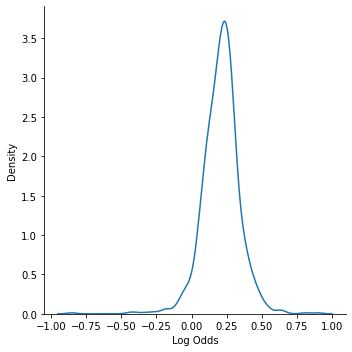

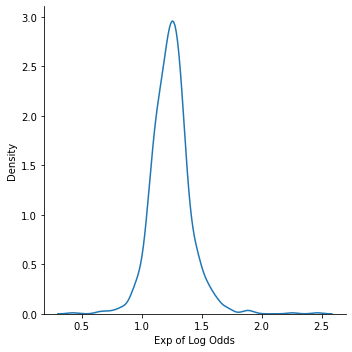

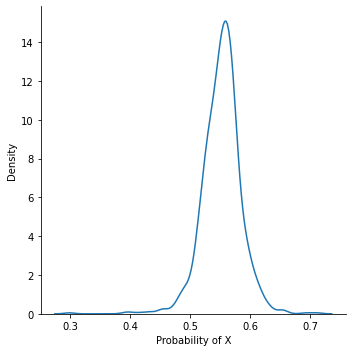

In [26]:
sns.displot(y_data_predicted['Log Odds'], kind = 'kde')
sns.displot(y_data_predicted['Exp of Log Odds'], kind = 'kde')
sns.displot(y_data_predicted['Probability of X'], kind = 'kde')

#action - combine the plots into a single plot

Looking ahead to comparison of logit, LDA, KNN for part (h). Metrics for assessing the fit would be needed.

The statsmodels library computes relevant metrics but only has logit model, not LDA or KNN.
The scikit-learn library does not provide the relevant metrics (p-value, confidence interval, etc).

Page below confirms that p-values and CIs etc are not available from scikit-learn.

https://datascience.stackexchange.com/questions/15398/how-to-get-p-value-and-confident-interval-in-logisticregression-with-sklearn

Python library pymvpa implementation of LDA, QDA, KNN is available however it is only released on python 2.
According to documentation it seems to have p-values and CIs.

It seems in R, the p-values are not reported for LDA, QDA, KNN therefore perhaps they are not applicable to these models.

ACTION: Look into optimising the fit by varying parameters under scikit-learn cross validation. My understanding however for LR, LDA, QDA - because there are no fundamental 'parameters' of this model, aside from the coefficients, that such an exercise wouldn't generate huge differences in the accuracy achieved. Whereas in KNN the _number of nearest neighbours_ could be varied.

The notebook at location below is one that executes the examples in python.

C:\Users\james\Jupyter Notebooks\ISLR\ISLR_Chapter_4_Classification.ipynb

#### Part (e) Repeat (d) using LDA.

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_train = LinearDiscriminantAnalysis()
LDA_train.fit(x_data_nd,y_data_train)
print("LDA Prediction for Lag2 of -0.8: ",LDA_train.predict([[-0.8]]),"\n")

LDA Prediction for Lag2 of -0.8:  ['Up'] 



#### Part (f) Repeat (d) using QDA.

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_train = QuadraticDiscriminantAnalysis()
QDA_train.fit(x_data_nd,y_data_train)
print("QDA Prediction for Lag2 of -0.8: ",QDA_train.predict([[-0.8]]))

QDA Prediction for Lag2 of -0.8:  ['Up']


#### Part (g) Repeat (d) using KNN with K = 1.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh_train = KNeighborsClassifier(n_neighbors=1)
neigh_train.fit(x_data_nd,y_data_train)

print("KNN Prediction for Lag2 of -0.8: ",neigh_train.predict([[-0.8]]))

KNN Prediction for Lag2 of -0.8:  ['Down']


Note the prediction with KNN is opposite to the other models (with 1 nearest neighbour at least)

Below I have analysed the means for weekly data and produced boxplots for lag2 to give some further intuition for the relationship between it and the direction.
Boxplots are shown separately for up and down.

ACTION - move these up to earlier points in the analysis as appropriate.

In [30]:
means_df=weekly_data.groupby('Direction').mean()
means_df.loc['Diff']=means_df.apply(lambda x: x['Up']-x['Down'])
print(means_df)

#weekly_data[['Lag2','Direction']].groupby('Direction').describe()

                  Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Direction                                                                  
Down       2000.198347  0.282295 -0.040424  0.207647  0.200021  0.187835   
Up         1999.928926  0.045217  0.304281  0.098851  0.102456  0.101539   
Diff         -0.269421 -0.237079  0.344705 -0.108795 -0.097564 -0.086296   

             Volume     Today  
Direction                      
Down       1.608536 -1.746585  
Up         1.547483  1.667086  
Diff      -0.061053  3.413671  


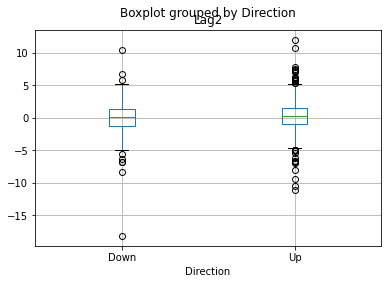

In [31]:
%matplotlib inline
fig1, ax1 = plt.subplots()
weekly_data.boxplot(column=['Lag2'],by='Direction',ax=ax1)
plt.show()

#### Part (h) Which of these methods appears to provide the best results on this data?

In [32]:
y_pred_logit = logreg_train.predict(x_data_nd)
y_pred_LDA = LDA_train.predict(x_data_nd)
y_pred_QDA = QDA_train.predict(x_data_nd)
y_pred_KNN = neigh_train.predict(x_data_nd)

print("Classification Report for Logistic Regression:\n",classification_report(y_data_train, y_pred_logit, labels=['Down','Up']),'\n')


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

        Down       0.53      0.05      0.10       441
          Up       0.56      0.96      0.71       544

    accuracy                           0.56       985
   macro avg       0.55      0.51      0.40       985
weighted avg       0.55      0.56      0.43       985
 



In [33]:
print("Confusion matrix for Logistic Regression:\n",confusion_matrix(y_data_train, y_pred_logit, labels=['Down','Up']),'\n')

print("Precision for Up  - Logistic Regression: ",round(precision_score(y_data_train, y_pred_logit,pos_label='Up')*100,1),"%")
print("Precision for Up  - LDA: ",round(precision_score(y_data_train, y_pred_LDA,pos_label='Up')*100,1),"%")
print("Precision for Up  - QDA: ",round(precision_score(y_data_train, y_pred_QDA,pos_label='Up')*100,1),"%")
print("Precision for Up  - KNN (1): ",round(precision_score(y_data_train, y_pred_KNN,pos_label='Up')*100,1),"%")

Confusion matrix for Logistic Regression:
 [[ 23 418]
 [ 20 524]] 

Precision for Up  - Logistic Regression:  55.6 %
Precision for Up  - LDA:  55.6 %
Precision for Up  - QDA:  55.2 %
Precision for Up  - KNN (1):  95.6 %


Note these statistics are based on the training data. The training error rate is often overly optimistic—it
tends to underestimate the test error rate.

A good classifier is one for which the test error rate is smallest.

The precision is a lot higher for KNN. Reflect on this after repeating for test dataset.

In [34]:
x_data_test = test_data.iloc[:,2]
y_data_test = test_data.iloc[:,8]

x_data_test_nd = np.ndarray(shape=(x_data_test.size,1))
x_data_test_nd[:,0] = x_data_test.values

print(x_data_test.shape,'\n')
print(x_data_test.head(),'\n')
print(y_data_test.head())

(104,) 

986   -1.698
987    6.760
988   -4.448
989   -4.518
990   -2.137
Name: Lag2, dtype: float64 

986    Down
987    Down
988    Down
989    Down
990      Up
Name: Direction, dtype: object


In [35]:
y_pred_test_logit = logreg_train.predict(x_data_test_nd)
y_pred_test_LDA = LDA_train.predict(x_data_test_nd)
y_pred_test_QDA = QDA_train.predict(x_data_test_nd)
y_pred_test_KNN = neigh_train.predict(x_data_test_nd)

print("Precision for Up  - Logistic Regression: ",round(precision_score(y_data_test, y_pred_test_logit,pos_label='Up')*100,1),"%")
print("Precision for Up  - LDA: ",round(precision_score(y_data_test, y_pred_test_LDA,pos_label='Up')*100,1),"%")
print("Precision for Up  - QDA: ",round(precision_score(y_data_test, y_pred_test_QDA,pos_label='Up')*100,1),"%")
print("Precision for Up  - KNN (1): ",round(precision_score(y_data_test, y_pred_test_KNN,pos_label='Up')*100,1),"%")

Precision for Up  - Logistic Regression:  62.2 %
Precision for Up  - LDA:  62.2 %
Precision for Up  - QDA:  58.7 %
Precision for Up  - KNN (1):  57.7 %


Logistic Regression & LDA appear to give the best results when targetting the precision score for Up movements.

In [36]:
print("Confusion matrix for LDA on test data:\n",confusion_matrix(y_data_test, y_pred_test_LDA, labels=['Down','Up']),'\n')
print("Confusion matrix for QDA on test data:\n",confusion_matrix(y_data_test, y_pred_test_QDA, labels=['Down','Up']),'\n')
print("Confusion matrix for KNN on test data:\n",confusion_matrix(y_data_test, y_pred_test_KNN, labels=['Down','Up']),'\n')

Confusion matrix for LDA on test data:
 [[ 9 34]
 [ 5 56]] 

Confusion matrix for QDA on test data:
 [[ 0 43]
 [ 0 61]] 

Confusion matrix for KNN on test data:
 [[21 22]
 [31 30]] 



#### Part (i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

Transformations - Like x^2

Interactions - like using product of volume and Lag2 as aninteraction variable


In [37]:
from patsy import dmatrices

def run(design,model_name,n_neighbors_input=1,print_coef_LR=False):
    model_set = {'LR':LogisticRegression(),'LDA':LinearDiscriminantAnalysis(),'QDA':QuadraticDiscriminantAnalysis(),'KNN':KNeighborsClassifier(n_neighbors=n_neighbors_input)}
    y, X = dmatrices(design, train_data, return_type = 'dataframe')
    model = model_set[model_name]
    model.fit(X,y_data_train)
    y_test, X_test = dmatrices(design, test_data, return_type = 'dataframe')
    y_predicted = model.predict(X_test)
    if print_coef_LR:
        print("Intercept", model.intercept_,"Coefficients:",model.coef_)
    print("Precision for Up - ",model_name,n_neighbors_input if model_name == 'KNN' else ""
          ,design,": ",round(precision_score(y_data_test, y_predicted,pos_label='Up')*100,4),"%")

In [38]:
def fit_all_and_report_precision():
    run('Direction~Lag2-1','LR')
    run('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume-1','LR')
    run('Direction~Lag2+Lag1-1','LR') # y = Lag2 + Lag1 + b
    run('Direction~Lag2*Lag1-1','LR') # y = Lag2 + Lag1 + Lag2*Lag1 + b
    run('Direction~Lag2+I(Lag2**2)-1','LR') # y = Lag2 + Lag2^2 + b
    run('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume-1','LDA')
    run('Direction~Lag2-1','LDA')
    run('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume-1','QDA')
    run('Direction~Lag2-1','QDA')
    run('Direction~Lag2-1','KNN',1)
    run('Direction~Lag2-1','KNN',2)
    run('Direction~Lag2-1','KNN',3)
    run('Direction~Lag2-1','KNN',4)
    run('Direction~Lag2-1','KNN',5)
    run('Direction~Lag2-1','KNN',6)
    run('Direction~Lag2-1','KNN',7)
    run('Direction~Lag2-1','KNN',15)

In [39]:
fit_all_and_report_precision()

Precision for Up -  LR  Direction~Lag2-1 :  62.2222 %
Precision for Up -  LR  Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume-1 :  58.6207 %
Precision for Up -  LR  Direction~Lag2+Lag1-1 :  59.5506 %
Precision for Up -  LR  Direction~Lag2*Lag1-1 :  59.5506 %
Precision for Up -  LR  Direction~Lag2+I(Lag2**2)-1 :  61.9565 %
Precision for Up -  LDA  Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume-1 :  58.6207 %
Precision for Up -  LDA  Direction~Lag2-1 :  62.2222 %
Precision for Up -  QDA  Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume-1 :  54.5455 %
Precision for Up -  QDA  Direction~Lag2-1 :  58.6538 %
Precision for Up -  KNN 1 Direction~Lag2-1 :  57.6923 %
Precision for Up -  KNN 2 Direction~Lag2-1 :  60.0 %
Precision for Up -  KNN 3 Direction~Lag2-1 :  59.4203 %
Precision for Up -  KNN 4 Direction~Lag2-1 :  66.6667 %
Precision for Up -  KNN 5 Direction~Lag2-1 :  59.0909 %
Precision for Up -  KNN 6 Direction~Lag2-1 :  60.3448 %
Precision for Up -  KNN 7 Direction~Lag2-1 :  60.2941 %
Precision for Up - 

In [40]:
y, X = dmatrices("Direction~Lag2-1", train_data, return_type = 'dataframe')
y_test, X_test = dmatrices("Direction~Lag2-1", test_data, return_type = 'dataframe')
y_predicted = KNeighborsClassifier(n_neighbors=10).fit(X,y_data_train).predict(X_test) 
print("Confusion matrix for KNN on test data:\n",confusion_matrix(y_data_test, y_predicted, labels=['Down','Up']),'\n')

Confusion matrix for KNN on test data:
 [[22 21]
 [24 37]] 



Of all the LR models, Lag2 does best.

For LDA and QDA, Lag2 alone does better than the full model.

The best score here is 67% for KNN with 4 nearest neighbours.

LDA achieves the same results as logistic regression - the text notes the common theoretical underpinnings. The text notes they can diverge when the assumption of normal distributions with the same variance in each class either holds very well or doesn't hold at all. The normal distribution has noted limitations in capturing the fat tails present in the stock returns so perhaps it's a little surprising that the two models align so closely.

The text notes that QDA is in between LDA and KNN in terms of flexibility. However in this analysis, it performs worse.

#3 and #4 produce the same precision, even though #4 includes an extra term - the product of Lag1 and Lag2. The following shows the coefficients are different.

From #5, adding the quadratic Lag2 to the logisitic regression is slight worse than just Lag2.

So KNN performs best but would you trade on it?

KNN is more flexible than the other models, being non-parametric. So it should have less bias, but perhaps suffer from more variance. Perhaps this strong result would not be repeated if using another sample

In [41]:
run('Direction~Lag2+Lag1-1','LR',print_coef_LR=True) # y = Lag2 + Lag1 + b
run('Direction~Lag2*Lag1-1','LR',print_coef_LR=True) # y = Lag2 + Lag1 + Lag2*Lag1 + b

Intercept [0.21108473] Coefficients: [[ 0.05380124 -0.05416658]]
Precision for Up -  LR  Direction~Lag2+Lag1-1 :  59.5506 %
Intercept [0.21142029] Coefficients: [[ 0.05342945 -0.05146017  0.00192588]]
Precision for Up -  LR  Direction~Lag2*Lag1-1 :  59.5506 %


***
### R & Python Study Group - Statistical Learning
***
05/05/2021

Demo - Classification Exercise

James Bredin